# 미션 2주차 

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [15]:
# 데이터의 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

## 1번 문제 : 전국 시도별 약국수를 구해주세요!
* 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.

In [20]:
# '상권업종소분류명' 컬럼 값 확인
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [21]:
# df_medical 변수에 상권업종소분류명이 약국인 데이터 저장
df_medical = df[df['상권업종소분류명'] == '약국'].copy()

# 약국들을 시도명 기준으로 개수 세기
df_medical['시도명'].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

## 2번 문제 : 빈도수 구하고 시각화하여, 동물병원이 어느 지역에 많은지 분석해주세요 !
* 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

In [28]:
# '상권업종소분류명' 이 '동물병원' 인 데이터 추출
df_animal = df[df['상권업종소분류명'] == '동물병원'].copy()

# 동물병원을 시도명 기준으로 개수세기
df_animal['시도명'].value_counts()

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

### 시각화 위한 기본 설정

In [36]:
# plt로 폰트 설정
import matplotlib.pyplot as plt

# window의 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 한글 폰트 사용시 minus 폰트가 깨지는 경우 방지 위해
plt.rc('axes', unicode_minus = False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

### 시각화

#### scatterplot 

<AxesSubplot:xlabel='경도', ylabel='위도'>

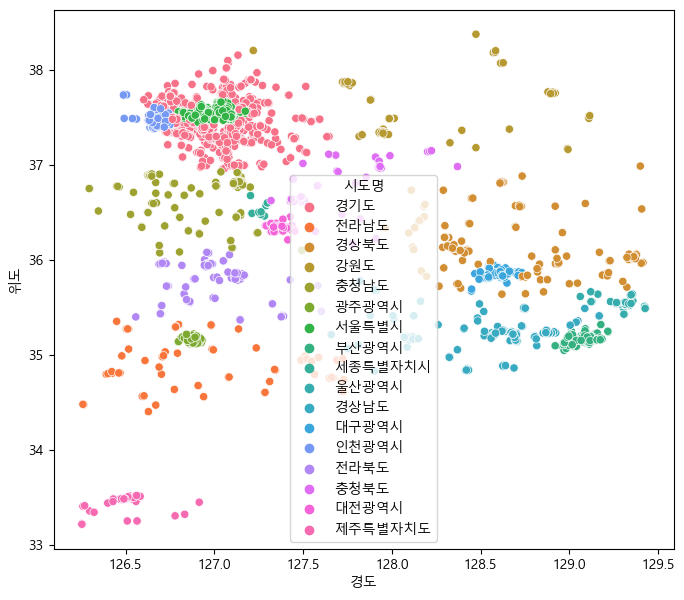

In [44]:
# seaborn의 scatterplot을 통해 동물병원 데이터(df_animal) 로 구별 경도와 위도 표시
import seaborn as sns

plt.figure(figsize=(8,7))
sns.scatterplot(data = df_animal, x= '경도', y='위도', hue='시도명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

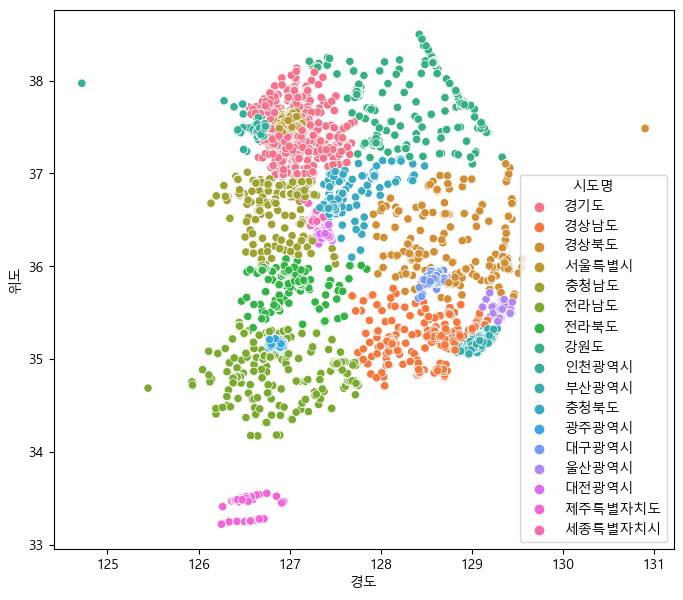

In [46]:
# seaborn의 scatterplot을 통해 약국 데이터(df_medical) 로 구별 경도와 위도 표시

plt.figure(figsize=(8,7))
sns.scatterplot(data = df_medical, x= '경도', y='위도', hue='시도명')

#### 막대그래프로 그리기

<AxesSubplot:>

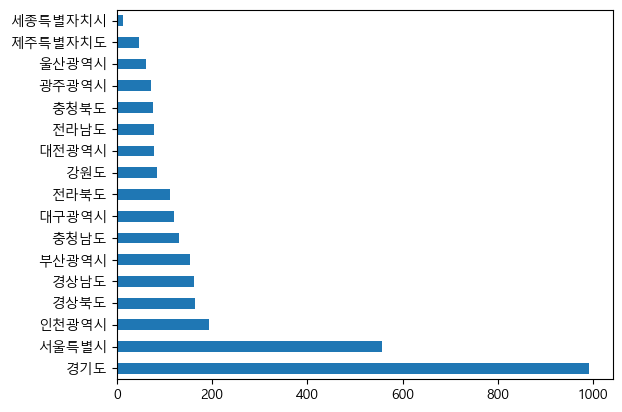

In [50]:
# 동물병원 데이터

df_animal['시도명'].value_counts().plot.barh()

<AxesSubplot:>

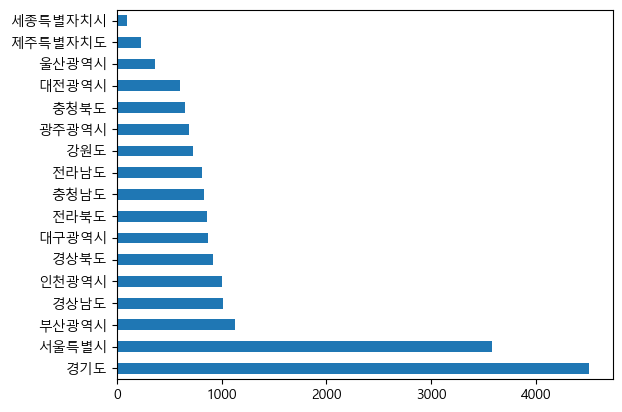

In [51]:
# 약국 데이터
df_medical['시도명'].value_counts().plot.barh()

## 3번 문제 : 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.
> 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!

> 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!

> 비율이 높은 순서대로 정렬되게 구해주세요!

In [130]:
# 서울 지역 병원 데이터
df_seoul = df[(df['시도명'] == '서울특별시') & (df['상권업종중분류명']=='병원')].copy()
df_seoul.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742


In [131]:
# 서울 지역의 '피부', '성형' 이 들어간 분류명 찾기
df_beauty = df_seoul[df_seoul['상권업종소분류명'].str.contains('피부|성형')]

# 정형외과가 포함되어 있으므로 이를 제거
drop_row = df_beauty[df_beauty['상호명'].str.contains('정형')].index
drop_row = drop_row.tolist()
drop_row

[1061,
 1291,
 1755,
 2124,
 2889,
 4078,
 4110,
 4189,
 5256,
 5326,
 5370,
 5384,
 5386,
 6575,
 7287,
 8531,
 8815,
 14816,
 15881,
 16069,
 16441,
 17309,
 20135,
 20293,
 20629,
 20692,
 22088,
 22328,
 23779,
 24702,
 24721,
 25847,
 26667,
 29307,
 30523,
 32005,
 33226,
 33399,
 34269,
 34677,
 35485,
 35655,
 35939,
 36035,
 36505,
 36580,
 36785,
 37053,
 37120,
 37132,
 37389,
 37979,
 38115,
 38141,
 39167,
 39403,
 39537,
 39548,
 39712,
 39746,
 39924,
 40494,
 40731,
 41100,
 41262,
 41437,
 42196,
 42465,
 43364,
 43914,
 43933,
 43971,
 44263,
 45032,
 45068,
 45325,
 45461,
 45650,
 45778,
 46125,
 46230,
 46570,
 46957,
 47503,
 48184,
 49086,
 49552,
 49871,
 50021,
 50080,
 50443,
 50605,
 51392,
 51825,
 52131,
 52424,
 52435,
 52866,
 53045,
 53833,
 54211,
 54258,
 54415,
 54622,
 54690,
 54772,
 54831,
 54842,
 54914,
 54960,
 55581,
 55721,
 56498,
 56538,
 57565,
 57852,
 57895,
 58166,
 59010,
 59878,
 60264,
 61062,
 61064,
 61730,
 62482,
 62502,
 62858,
 

In [132]:
# 해당 셀을 삭제하고 삭제 전과 후의 행의 개수 비교

print(df_beauty.shape)
df_beauty = df_beauty.drop(drop_row, axis = 0) # 행기준 삭제
print(df_beauty.shape)

(1373, 39)
(1127, 39)


In [133]:
# '상권업종중분류명' 컬럼 확인

df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [134]:
# 지역별 피부 또는 성형외과 병원 수 데이터프레임으로 저장
cal_ratio = df_beauty['시군구명'].value_counts().to_frame()
cal_ratio

,시군구명
강남구,575
서초구,174
송파구,33
마포구,29
강동구,29
광진구,27
영등포구,25
중구,25
서대문구,23
강서구,21


In [135]:
# 지역별 병원 수를 데이터프레임 새로운 열로 추가
cal_ratio['전체병원'] = df_seoul['시군구명'].value_counts().to_frame()
cal_ratio.columns = ['피부|성형', '전체 병원']
cal_ratio

,피부|성형,전체 병원
강남구,575,2550
서초구,174,1196
송파구,33,748
마포구,29,456
강동구,29,494
광진구,27,600
영등포구,25,516
중구,25,423
서대문구,23,379
강서구,21,579


In [137]:
# 비율 계산 후 추가
cal_ratio['비율'] = ( cal_ratio['피부|성형'] / cal_ratio['전체 병원'] ).round(2)
cal_ratio

,피부|성형,전체 병원,비율
강남구,575,2550,0.23
서초구,174,1196,0.15
송파구,33,748,0.04
마포구,29,456,0.06
강동구,29,494,0.06
광진구,27,600,0.04
영등포구,25,516,0.05
중구,25,423,0.06
서대문구,23,379,0.06
강서구,21,579,0.04


In [140]:
# 비율 순서대로 정렬
ratio_sort = cal_ratio.sort_values(by='비율', ascending = False).copy()
ratio_sort = ratio_sort['비율']
ratio_sort

강남구     0.23
서초구     0.15
중구      0.06
마포구     0.06
강동구     0.06
서대문구    0.06
양천구     0.05
영등포구    0.05
강서구     0.04
성북구     0.04
은평구     0.04
송파구     0.04
용산구     0.04
중랑구     0.04
광진구     0.04
관악구     0.03
강북구     0.03
구로구     0.03
성동구     0.03
동작구     0.03
노원구     0.03
동대문구    0.02
종로구     0.02
금천구     0.01
도봉구     0.01
Name: 비율, dtype: float64

## folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
* folium 문서 : https://python-visualization.github.io/folium/quickstart.html

In [141]:
import folium

# '상권업종소분류명' 컬럼 값 확인
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [143]:
# 노인/치매병원 데이터만 추출

df_senior = df[df['상권업종소분류명']=='노인/치매병원']
df_senior.shape

(1055, 39)

In [151]:
map = folium.Map(location = [df_senior['위도'].mean(), df_senior['경도'].mean()], zoom_start = 7)

for n in df_senior.index:
    
    name = df_senior.loc[n,'상호명']
    address = df_senior.loc[n,'도로명주소']
    popup = f"{name}-{address}"
    location = [df_senior.loc[n,'위도'], df_senior.loc[n,'경도']]
    folium.Marker(location= location, popup = popup, ).add_to(map)
map